Importing Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Loading Data

In [3]:
profiles_df = pd.read_csv('/content/customer_social_profiles - customer_social_profiles.csv')
transactions_df = pd.read_csv('/content/customer_transactions - customer_transactions.csv')
profiles_df.head(5)
transactions_df.head(5)

,customer_id,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,1/1/2024,Sports,2.3
1,192,1002,332,1/2/2024,Electronics,4.2
2,114,1003,442,1/3/2024,Electronics,2.1
3,171,1004,256,1/4/2024,Clothing,2.8
4,160,1005,64,1/5/2024,Clothing,1.3


Dataset Merge

In [4]:
profiles_df['customer_id'] = profiles_df['customer_id'].str.replace('A', '').astype(int)
merged_df = pd.merge(transactions_df, profiles_df, on='customer_id', how='inner')
merged_df.head(5)

,customer_id,transaction_id,purchase_amount,purchase_date,product_category,customer_rating,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,151,1001,408,1/1/2024,Sports,2.3,TikTok,61,1.3,Neutral
1,151,1001,408,1/1/2024,Sports,2.3,Twitter,72,1.6,Neutral
2,151,1001,408,1/1/2024,Sports,2.3,Twitter,82,3.6,Negative
3,192,1002,332,1/2/2024,Electronics,4.2,Instagram,60,4.3,Positive
4,114,1003,442,1/3/2024,Electronics,2.1,Facebook,87,4.8,Negative


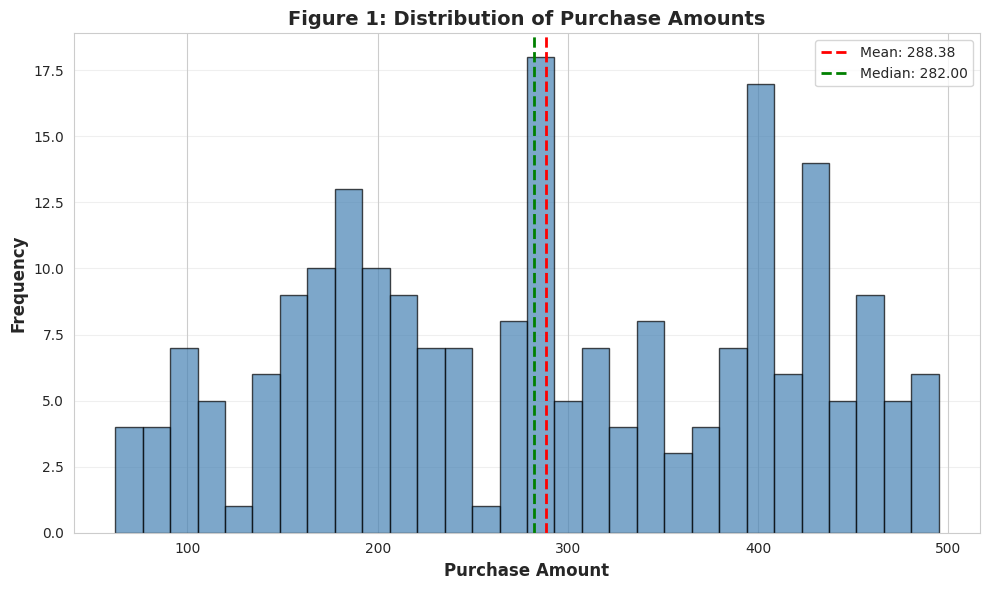

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load merged dataset (adjust path if needed)
df = pd.read_csv('/content/merged_customer_data.csv')  # or use merged_df if already loaded

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# ============================================================================
# FIGURE 1: Distribution of Purchase Amounts
# ============================================================================
plt.figure(figsize=(10, 6))
plt.hist(df['purchase_amount'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Purchase Amount', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Figure 1: Distribution of Purchase Amounts', fontsize=14, fontweight='bold')
plt.axvline(df['purchase_amount'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["purchase_amount"].mean():.2f}')
plt.axvline(df['purchase_amount'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["purchase_amount"].median():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

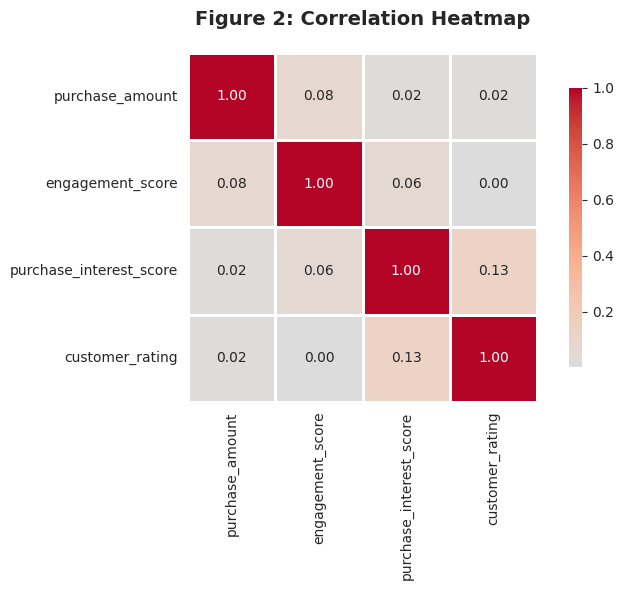


Key Correlations:
engagement_score ↔ purchase_interest_score: 0.062
purchase_amount ↔ engagement_score: 0.076


In [7]:

# ============================================================================
# FIGURE 2: Correlation Heatmap
# ============================================================================
# Select numeric columns for correlation
numeric_cols = ['purchase_amount', 'engagement_score', 'purchase_interest_score', 'customer_rating']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            xticklabels=numeric_cols, yticklabels=numeric_cols)
plt.title('Figure 2: Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print correlation values
print("\nKey Correlations:")
print(f"engagement_score ↔ purchase_interest_score: {corr_matrix.loc['engagement_score', 'purchase_interest_score']:.3f}")
print(f"purchase_amount ↔ engagement_score: {corr_matrix.loc['purchase_amount', 'engagement_score']:.3f}")


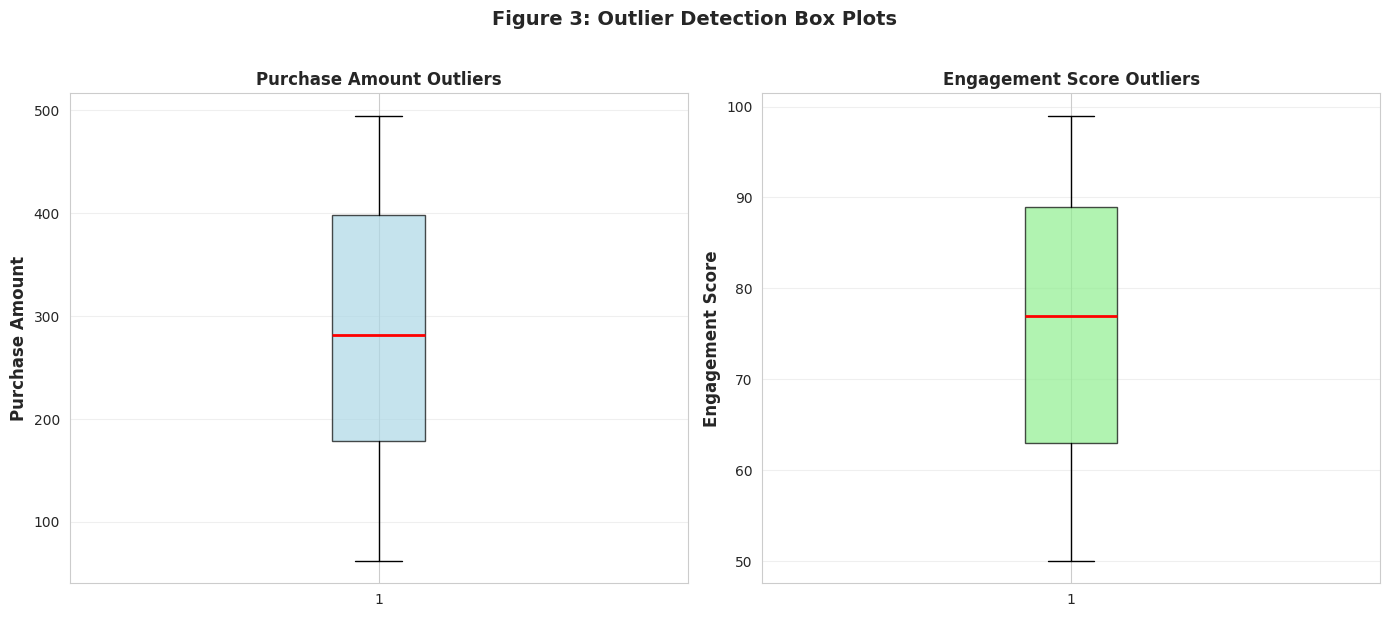


Outlier Summary:
Purchase Amount: 0 outliers above 726.50
Engagement Score: 0 outliers


In [8]:
# ============================================================================
# FIGURE 3: Outlier Detection Box Plot
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Purchase Amounts
axes[0].boxplot(df['purchase_amount'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[0].set_ylabel('Purchase Amount', fontsize=12, fontweight='bold')
axes[0].set_title('Purchase Amount Outliers', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Box plot for Engagement Scores
axes[1].boxplot(df['engagement_score'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Engagement Score', fontsize=12, fontweight='bold')
axes[1].set_title('Engagement Score Outliers', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('Figure 3: Outlier Detection Box Plots', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Calculate outliers using IQR method
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), upper_bound

purchase_outliers, purchase_threshold = count_outliers(df['purchase_amount'])
engagement_outliers, engagement_threshold = count_outliers(df['engagement_score'])

print(f"\nOutlier Summary:")
print(f"Purchase Amount: {purchase_outliers} outliers above {purchase_threshold:.2f}")
print(f"Engagement Score: {engagement_outliers} outliers")


In [ ]:
import pillow_heif

# ensure pillow_heif is registered so PIL can open HEIC files
pillow_heif.register_heif_opener()

def load_image(path=r'C:\Users\LENOVO\Cloned repos\ml-pipeline-formative\ML-Pipeline-formative-2\data\images\antony_neutral.heic', size=None):
    """
    Load an image (HEIC supported via pillow_heif).
    - path: path to the image (string)
    - size: optional (width, height) tuple to resize the image
    Returns a PIL.Image.Image instance.
    """
    image = Image.open(path)
    if size is not None:
        image = image.resize(size)
    return image

def augmen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              219 non-null    int64  
 1   transaction_id           219 non-null    int64  
 2   purchase_amount          219 non-null    int64  
 3   purchase_date            219 non-null    object 
 4   product_category         219 non-null    object 
 5   customer_rating          200 non-null    float64
 6   social_media_platform    219 non-null    object 
 7   engagement_score         219 non-null    int64  
 8   purchase_interest_score  219 non-null    float64
 9   review_sentiment         219 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 17.2+ KB


Save Merged Dataset

In [ ]:
merged_df.to_csv('C:\\Users\\LENOVO\\Cloned repos\\ml-pipeline-formative\\ML-Pipeline-formative-2\\data\\merged_customer_data.csv', index=False)
print(f"Merged dataset saved successfully. Shape: {merged_df.shape}")

Merged dataset saved successfully. Shape: (219, 10)
